###Data Cleansing

In [403]:
import numpy as np
import os 
import pandas as pd

In [404]:
import numpy as np
import os 
import pandas as pd
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
import pyodbc
import seaborn as sns
sns.set()
#plt.style.use('seaborn')
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
import missingno as msno
import warnings
import datetime
warnings.filterwarnings("ignore")
import nltk
#nltk.download('popular')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Meital
[nltk_data]     atar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Meital
[nltk_data]     atar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [405]:
df = pd.read_pickle(r"spotify_songs_df_after_data_prep_9.3.25.pkl")

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   track_id                       28356 non-null  string        
 1   track_artist                   28352 non-null  string        
 2   track_popularity               28356 non-null  int64         
 3   track_album_id                 28356 non-null  string        
 4   track_album_release_date       26675 non-null  datetime64[ns]
 5   danceability                   28356 non-null  float64       
 6   energy                         28356 non-null  float64       
 7   key                            28356 non-null  int64         
 8   loudness                       28356 non-null  float64       
 9   mode                           28356 non-null  int64         
 10  speechiness                    28356 non-null  float64       
 11  acousticness        

In [407]:
df.shape

(28356, 20)

In [408]:
#
df=df.drop(columns=['track_album_release_date_year'])

In [409]:
# Selecting only numeric continuous columns (excluding categorical and discrete)
# In most cases, continuous variables are numeric and float types
continuous_df = df.select_dtypes(include=['float64', 'int64'])
continuous_df = continuous_df.astype({col: 'float64' for col in continuous_df.select_dtypes(include='int64').columns})

# Display the small dataset with only numeric continuous data
continuous_df

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count_per_song,playlist_genre_count_per_song
0,66.0,0.748,0.916,6.0,-2.634,1.0,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754.0,2.0,2.0
1,67.0,0.726,0.815,11.0,-4.969,1.0,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600.0,2.0,2.0
2,70.0,0.675,0.931,1.0,-3.432,0.0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616.0,3.0,3.0
3,60.0,0.718,0.930,7.0,-3.778,1.0,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093.0,1.0,1.0
4,69.0,0.650,0.833,1.0,-4.672,1.0,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42.0,0.428,0.922,2.0,-1.814,1.0,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375.0,1.0,1.0
32829,20.0,0.522,0.786,0.0,-4.462,1.0,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120.0,1.0,1.0
32830,14.0,0.529,0.821,6.0,-4.899,0.0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112.0,1.0,1.0
32831,15.0,0.626,0.888,2.0,-3.361,1.0,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432.0,1.0,1.0


In [410]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   track_popularity               28356 non-null  float64
 1   danceability                   28356 non-null  float64
 2   energy                         28356 non-null  float64
 3   key                            28356 non-null  float64
 4   loudness                       28356 non-null  float64
 5   mode                           28356 non-null  float64
 6   speechiness                    28356 non-null  float64
 7   acousticness                   28356 non-null  float64
 8   instrumentalness               28356 non-null  float64
 9   liveness                       28356 non-null  float64
 10  valence                        28356 non-null  float64
 11  tempo                          28356 non-null  float64
 12  duration_ms                    28356 non-null  floa

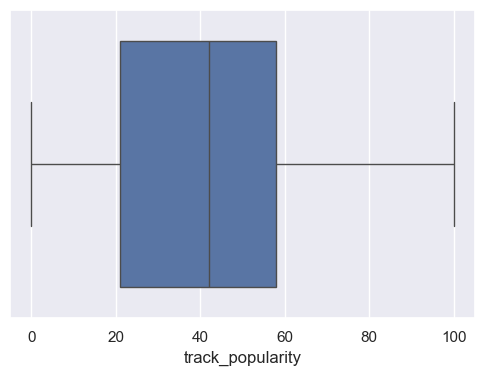

In [411]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['track_popularity'])

plt.show()

Target Value after log scale

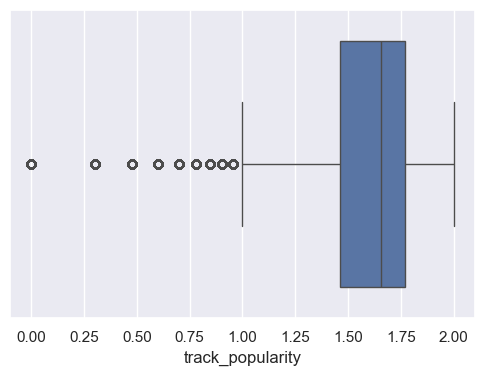

In [412]:
target_pop_log = np.log10(df['track_popularity'])

# Create the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_pop_log)  # Use x= or y= explicitly

# Show the plot
plt.show()

In [413]:
continuous_df_log=np.log10(continuous_df)

# Outliers

In [414]:
df_num_non_dummy = df.select_dtypes(include=['int64', 'float64'])  # Select numerical columns

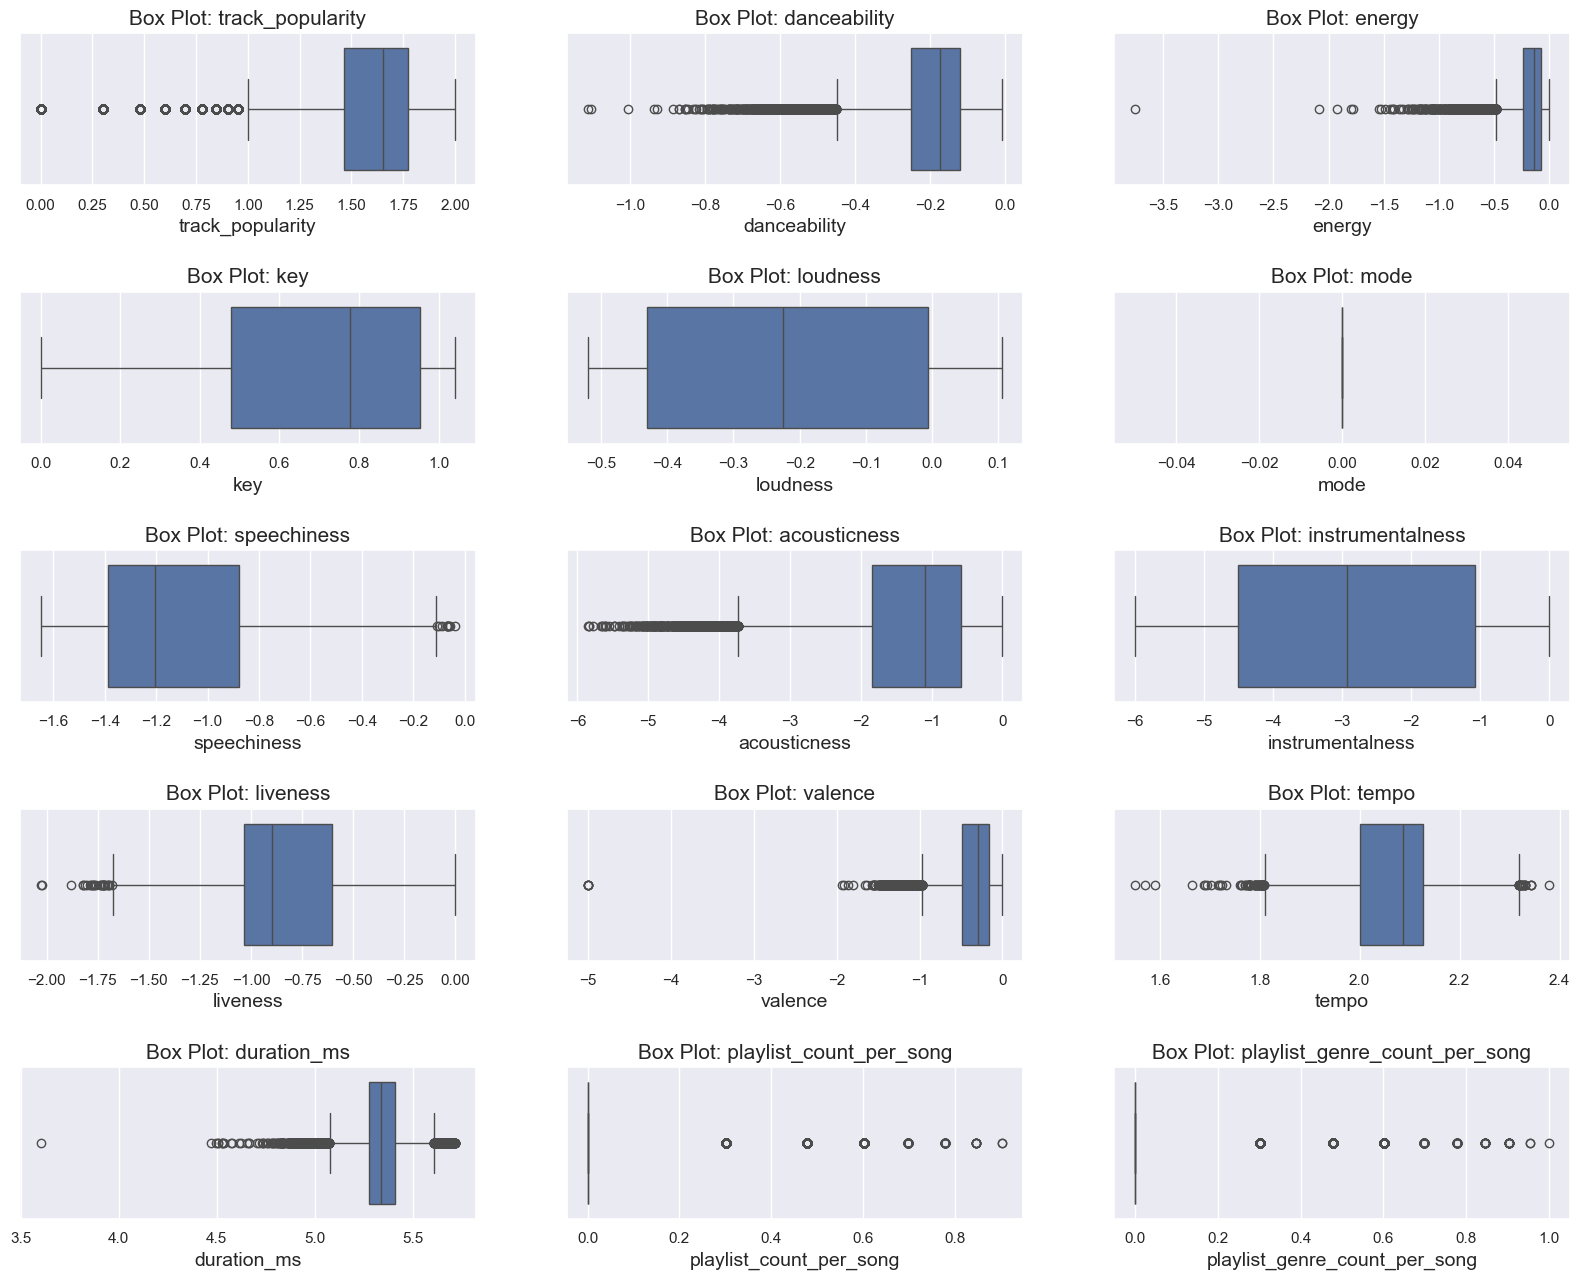

In [415]:
def outliers_boxplot(df):
    plt.figure(figsize=(20, 200))
    for i, col in enumerate(df.columns):
        ax = plt.subplot(60, 3, i + 1)
        sb.boxplot(data=df, x=col, ax=ax)
        plt.title(f'Box Plot: {col}', fontsize=15)
        plt.xlabel(f'{col}', fontsize=14)
    plt.subplots_adjust(hspace=0.7)
    plt.show()

# Assuming con_df contains the continuous numeric columns
outliers_boxplot(continuous_df_log)


In [416]:
#Creating Nulls dataframe and matrix

## outliers_df


In [417]:
def outliers_df(df):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])
    
    for col in df:
        if col != 'track_popularity':  # Exclude track_popularity from outlier analysis
            temp = pd.DataFrame(df[col], columns=[col])
            
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1  # Interquartile range
            
            upper_limit = Q3 + 1.5 * IQR
            lower_limit = Q1 - 1.5 * IQR  # Fixed lower limit calculation
            
            upper_outliers = temp[temp[col] > upper_limit]
            lower_outliers = temp[temp[col] < lower_limit]
            temp = pd.concat([upper_outliers, lower_outliers])  # Updated appending method
            
            num = len(temp)
            total_outliers.loc[col] = [num, num / len(df) * 100]  # Assign values correctly
    
    return total_outliers[total_outliers['Percent'] > 0]

# Run function and sort results
outliers_df = outliers_df(df_num_non_dummy).sort_values('Percent', ascending=False)
outliers_df

,Outlier count,Percent
instrumentalness,6085.0,21.459303
playlist_genre_count_per_song,3166.0,11.165185
playlist_count_per_song,2818.0,9.937932
speechiness,2725.0,9.609959
acousticness,1911.0,6.739314
liveness,1623.0,5.723656
duration_ms,1197.0,4.221329
loudness,837.0,2.951756
tempo,494.0,1.742136
danceability,257.0,0.906334


In [418]:
outliers_df.to_csv('outliers_df.csv')

## new_outliers_df

Labeling every outlier with 'Outlier' in order to seperate the outliers from nulls (temporarily, and then to 0/1):

> Add blockquote


In [419]:
import numpy as np  # Import numpy for numerical operations

def outliers(df):  
    """
    Identifies outliers in a DataFrame and labels them as 'Outlier'.
    Outliers are determined using the interquartile range (IQR) method.
    """
    
    label_out_df = df.copy()  # Create a copy of the input DataFrame to avoid modifying the original data
    
    for col in label_out_df:  # Iterate over each column in the DataFrame
        if col in outliers_df.index:  # Check if the column is listed in 'outliers_df' (this variable needs to be defined elsewhere)
            
            Q1 = label_out_df[col].quantile(0.25)  # Calculate the first quartile (25th percentile)
            Q3 = label_out_df[col].quantile(0.75)  # Calculate the third quartile (75th percentile)
            
            # Compute the upper and lower limits for detecting outliers
            upper_limit = Q1 + 1.5 * (Q3 - Q1)  # Upper limit for detecting outliers
            lower_limit = Q3 - 1.5 * (Q3 - Q1)  # Lower limit for detecting outliers (should be Q1 - 1.5*(Q3-Q1), seems to be a mistake)
            
            # Replace values greater than the upper limit or less than the lower limit with the label 'Outlier'
            label_out_df[col] = np.where(label_out_df[col] > upper_limit, 'Outlier', 
                                         np.where(label_out_df[col] < lower_limit, 'Outlier', label_out_df[col]))
    
    return label_out_df  # Return the modified DataFrame with outliers labeled

# Apply the function to the DataFrame and display the first 10 rows
new_df_outliers = outliers(df)
new_df_outliers.head(10)

,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count_per_song,playlist_genre_count_per_song
0,6f807x0ima9a1j3vpbc7vn,ed sheeran,66,2ocs0dgtsro98gh5zsl2cx,2019-06-14,0.748,0.916,6,Outlier,1,0.0583,0.102,0.0,0.0653,0.518,122.036,194754,Outlier,Outlier
1,0r7cvbztwzgbtcydfa2p31,maroon 5,67,63rpso264urjw1x5e6cwv6,2019-12-13,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,Outlier,0.693,99.972,162600,Outlier,Outlier
2,1z1hg7vb0ahhdiemnde79l,zara larsson,70,1hosmj2elcsrr0ve9gthr4,2019-07-05,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-05,0.11,0.613,124.008,176616,Outlier,Outlier
3,75fpbthrwqmzhlbjlugdc7,the chainsmokers,60,1nqysoef1ykkugovchbsk6,2019-07-19,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-06,0.204,0.277,121.956,169093,1,1
4,1e8pafckuyokkxphrhqw4x,lewis capaldi,69,7m7vv9wlq4i0lfujie2zsq,2019-03-05,0.65,0.833,1,-4.672,1,0.0359,0.0803,0.0,0.0833,0.725,123.976,189052,1,1
5,7fvumiyapmsrrxr07cu8ef,ed sheeran,67,2yiy9cd2qktrnvwc2eui0k,2019-07-11,0.675,0.919,8,-5.385,1,0.127,0.0799,0.0,0.143,0.585,124.982,163049,Outlier,Outlier
6,2oaylpuddfwrgfe0lyqlcq,katy perry,62,7inhyseusaflyrhsnxm8qh,2019-07-26,Outlier,0.856,5,-4.788,0,0.0623,0.187,0.0,0.176,0.152,112.648,187675,1,1
7,6b1rnvacjjqh73ezo4blab,sam feldt,69,6703srpslks4bptmffjes1,2019-08-29,0.542,0.903,4,Outlier,0,0.0434,0.0335,4.83e-06,0.111,0.367,127.936,207619,Outlier,Outlier
8,7bf6tco3gfb8inredcjnt5,avicii,68,7cvafgvq4rliwebt9o8iav,2019-06-14,0.594,0.935,8,-3.562,1,0.0565,0.0249,3.97e-06,Outlier,0.366,127.015,193187,Outlier,Outlier
9,1ixgilkpm0tocneq00kcpa,shawn mendes,67,4qxzbfssvryeqwvpfev5iu,2019-06-20,0.642,0.818,2,-4.552,1,0.032,0.0567,0.0,0.0919,0.590,124.957,253040,Outlier,Outlier


## df_outliers

## Creating a dataframe with outliers as 1 and non-outliers as 0:

In [420]:
df_outliers = new_df_outliers.isin(['Outlier']) 
df_outliers = df_outliers.astype('int')
df_outliers

,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count_per_song,playlist_genre_count_per_song
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
32829,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
32830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32831,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0


In [421]:
#Now that we have a dataframe saving all the outliers we'll convert all the outliers to nulls, just so I can see differences in distribution with and without outliers and then decide which of the outliers to remove or not:

In [422]:
def capping(df):
    temp = df.copy()
    for col in temp:
        if col in outliers_df.index:
            Q1 = temp[col].quantile(0.25)
            Q3 = temp[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            temp[col] = np.where(temp[col] > upper_limit,np.nan,np.where(temp[col] < lower_limit,np.nan,temp[col]))
    return temp
temp = capping(df)
temp

,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count_per_song,playlist_genre_count_per_song
0,6f807x0ima9a1j3vpbc7vn,ed sheeran,66,2ocs0dgtsro98gh5zsl2cx,2019-06-14,0.748,0.916,6,NaN,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754.0,NaN,NaN
1,0r7cvbztwzgbtcydfa2p31,maroon 5,67,63rpso264urjw1x5e6cwv6,2019-12-13,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,NaN,0.6930,99.972,162600.0,NaN,NaN
2,1z1hg7vb0ahhdiemnde79l,zara larsson,70,1hosmj2elcsrr0ve9gthr4,2019-07-05,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616.0,NaN,NaN
3,75fpbthrwqmzhlbjlugdc7,the chainsmokers,60,1nqysoef1ykkugovchbsk6,2019-07-19,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093.0,1.0,1.0
4,1e8pafckuyokkxphrhqw4x,lewis capaldi,69,7m7vv9wlq4i0lfujie2zsq,2019-03-05,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnkaamr3snq1vgluvfc1,lush simon,42,2azrobbweeeyhqv6sb7jrt,2014-04-28,NaN,0.922,2,NaN,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375.0,1.0,1.0
32829,5aevni09em4575077nkwhz,tegan and sara,20,6kd6klxj7s8ece3abvayf5,2013-03-08,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,NaN,0.4000,128.041,NaN,1.0,1.0
32830,7immqpp3q1yfuhvsdn7weo,starkillers,14,0ltwnsy9jgxoizo4vzuca6,2014-04-21,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112.0,1.0,1.0
32831,2m69mhnfq1oq6lgtxuyhgx,mat zo,15,1fgrokhnhjcstl14znx8jy,2014-01-01,0.626,0.888,2,-3.361,1,0.1090,0.007920,NaN,NaN,0.3080,128.008,NaN,1.0,1.0


In [423]:
temp.to_csv('outliers_q_df.csv')

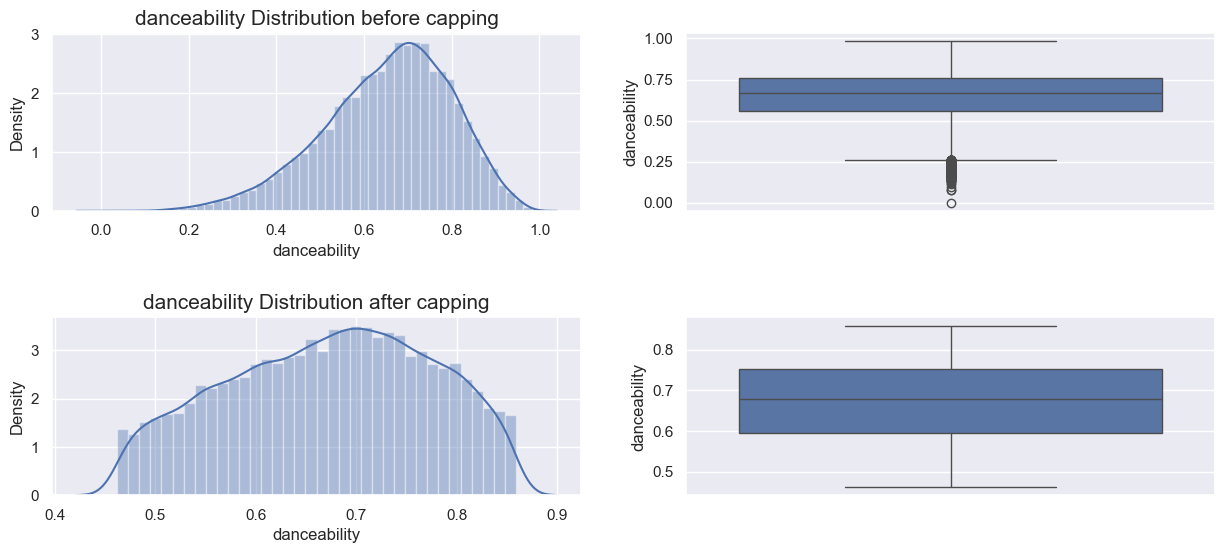

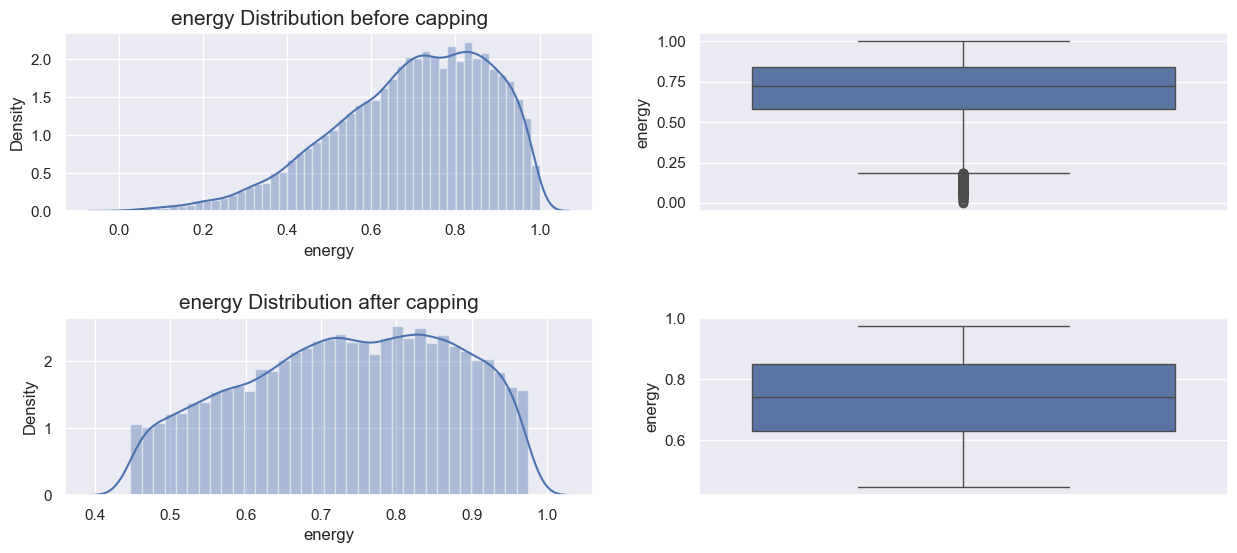

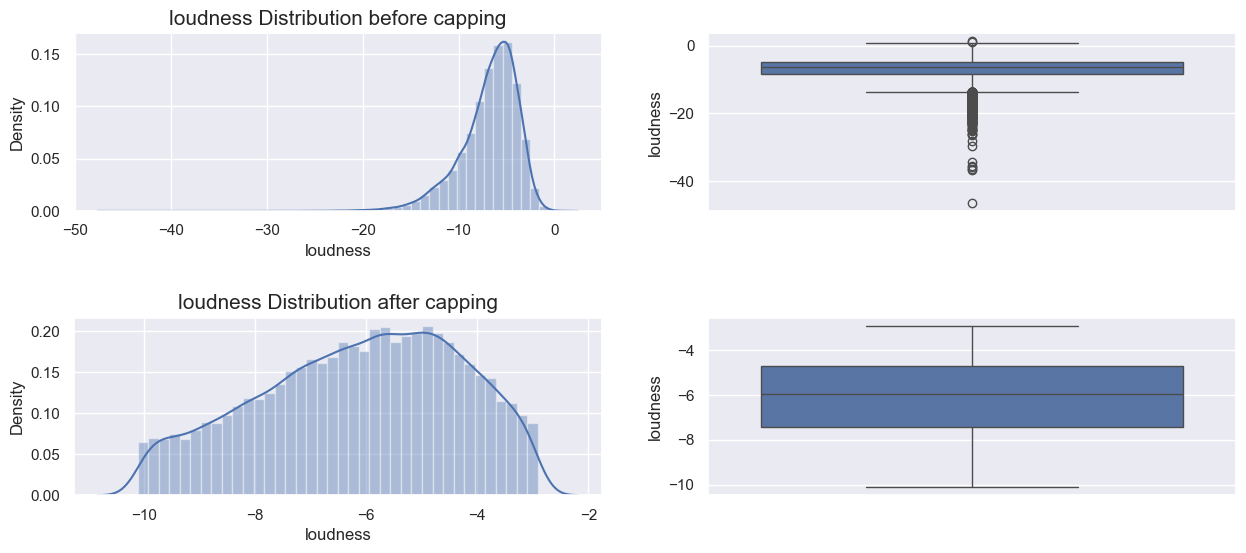

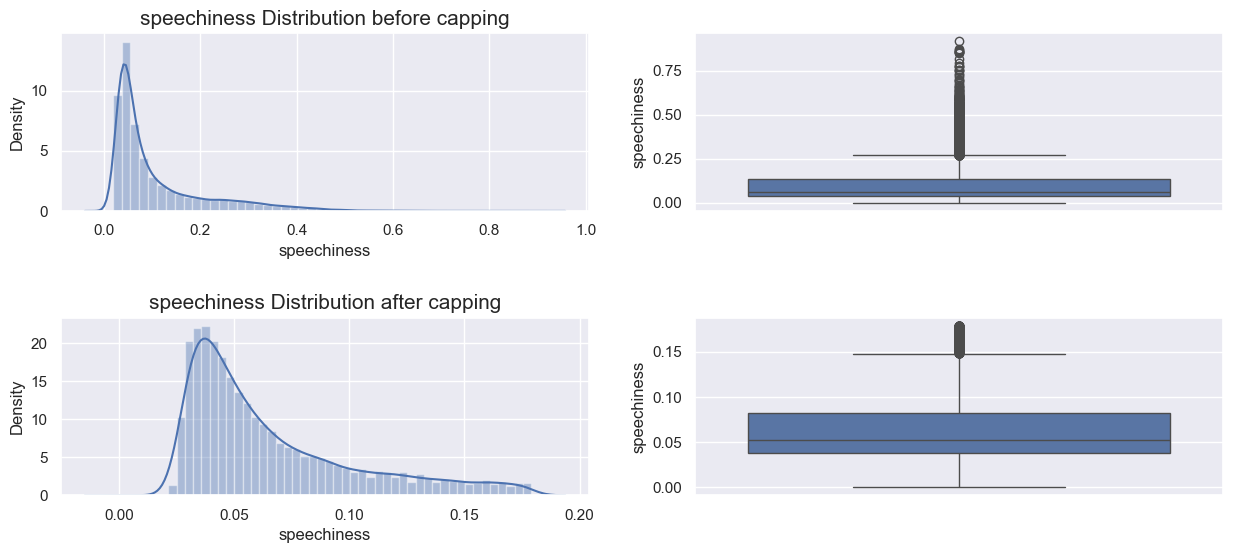

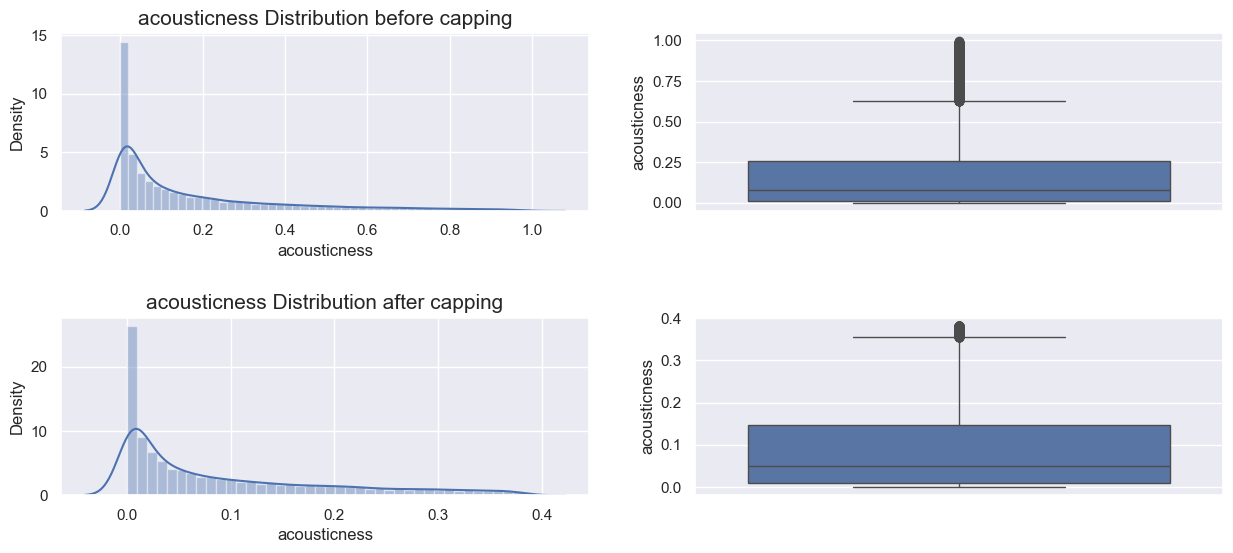

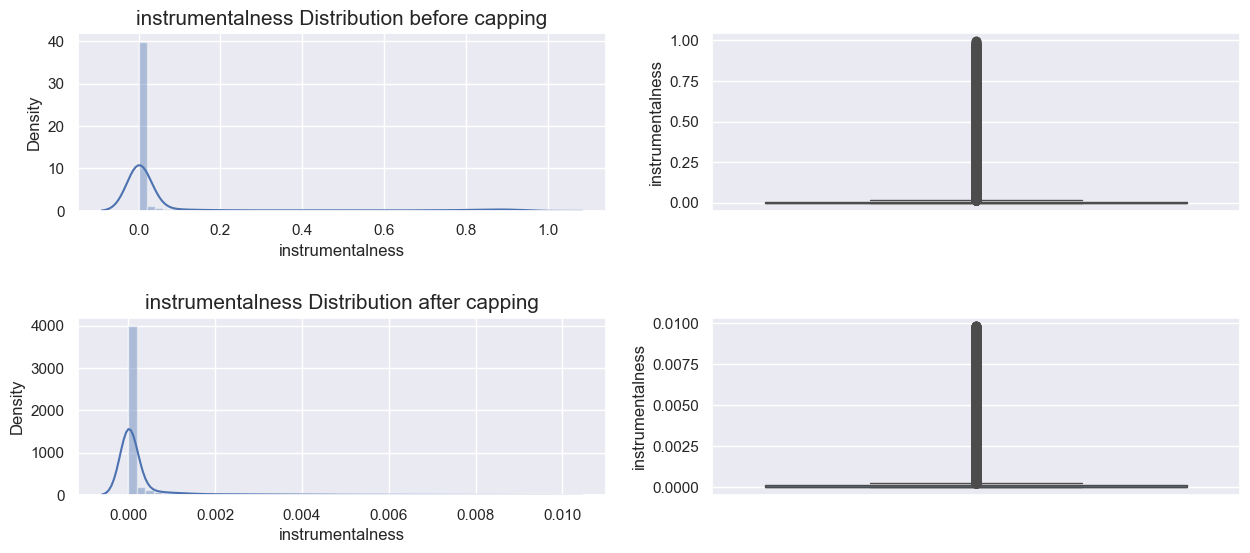

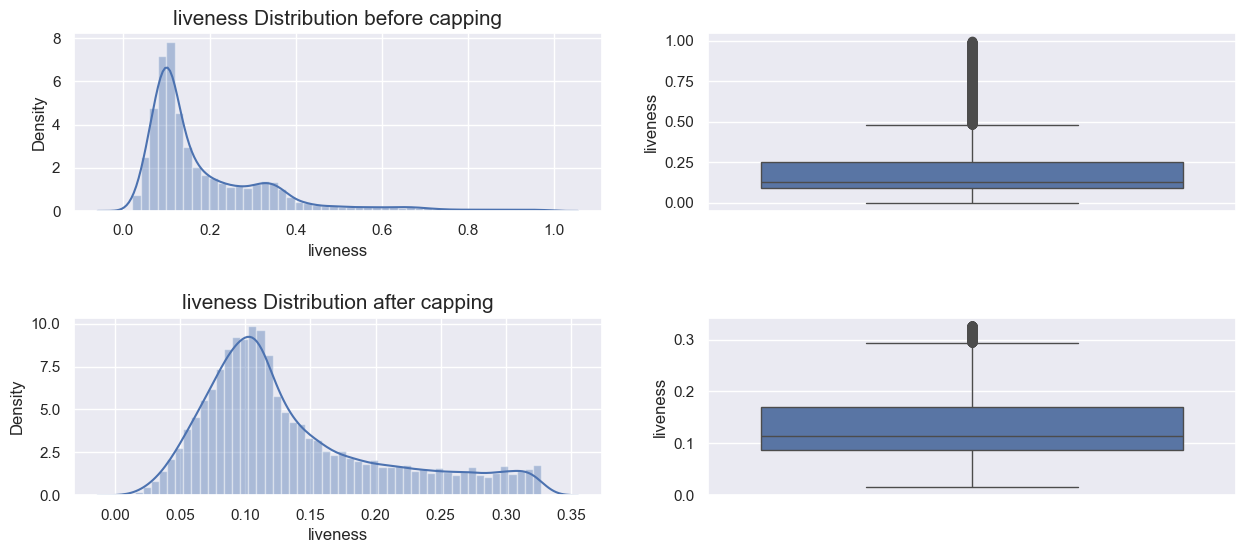

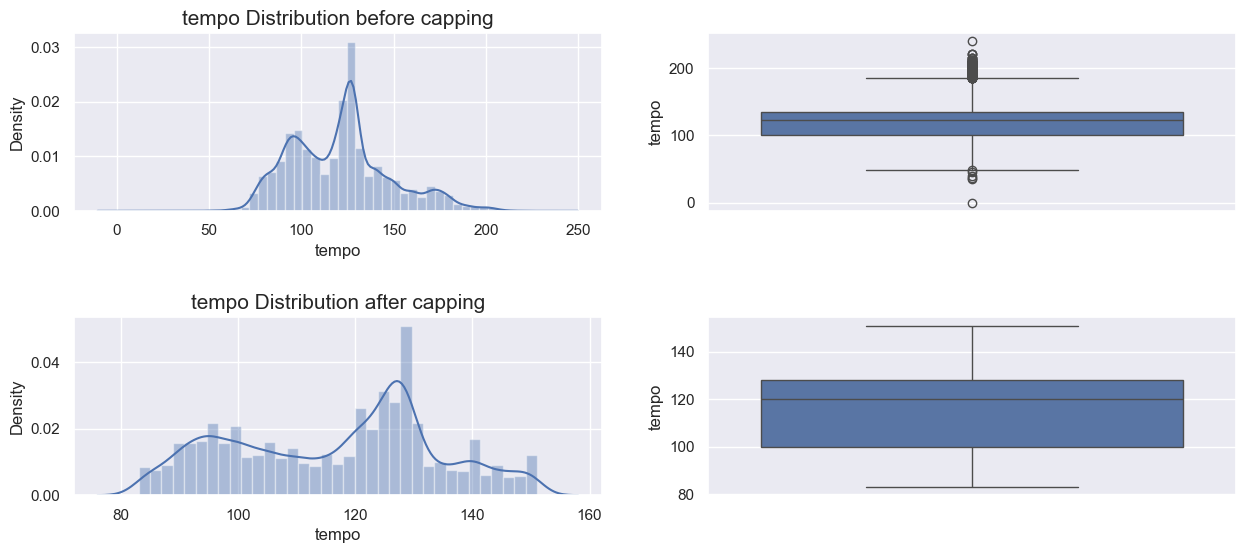

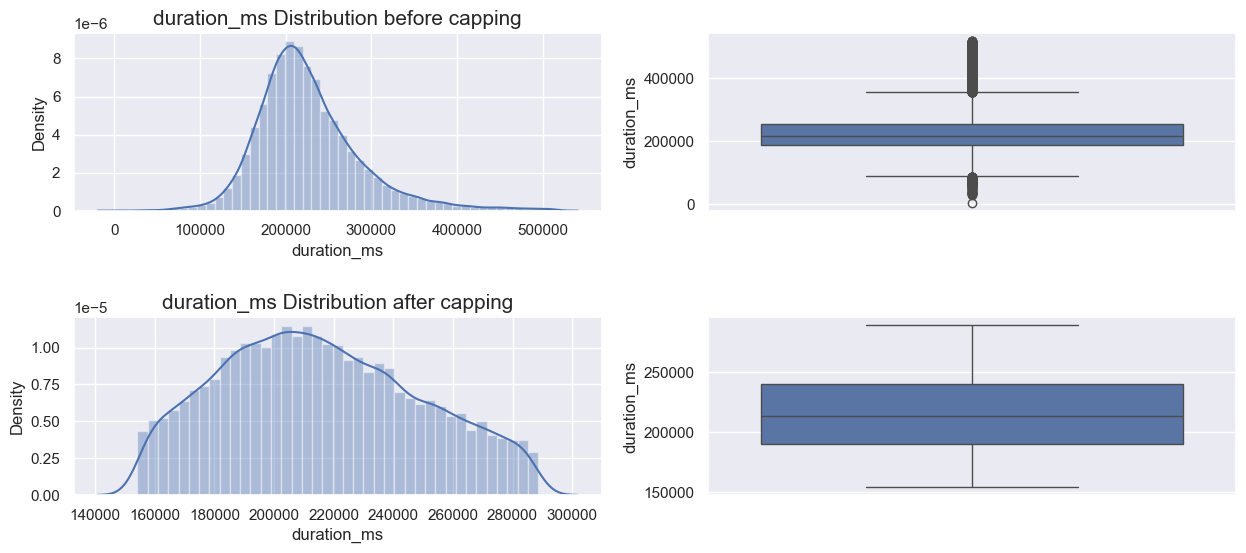

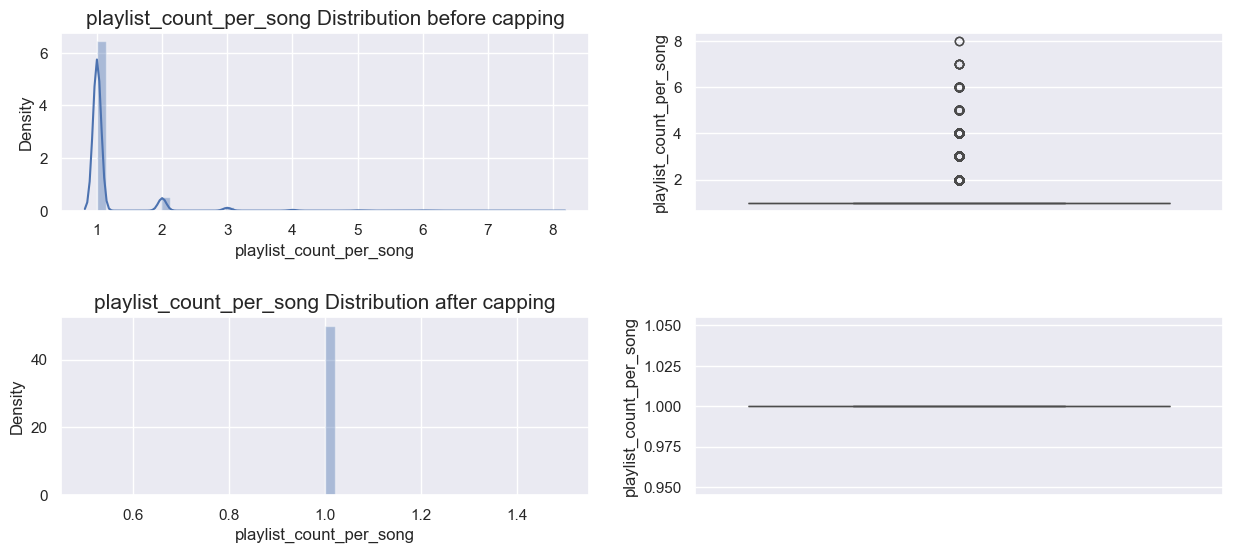

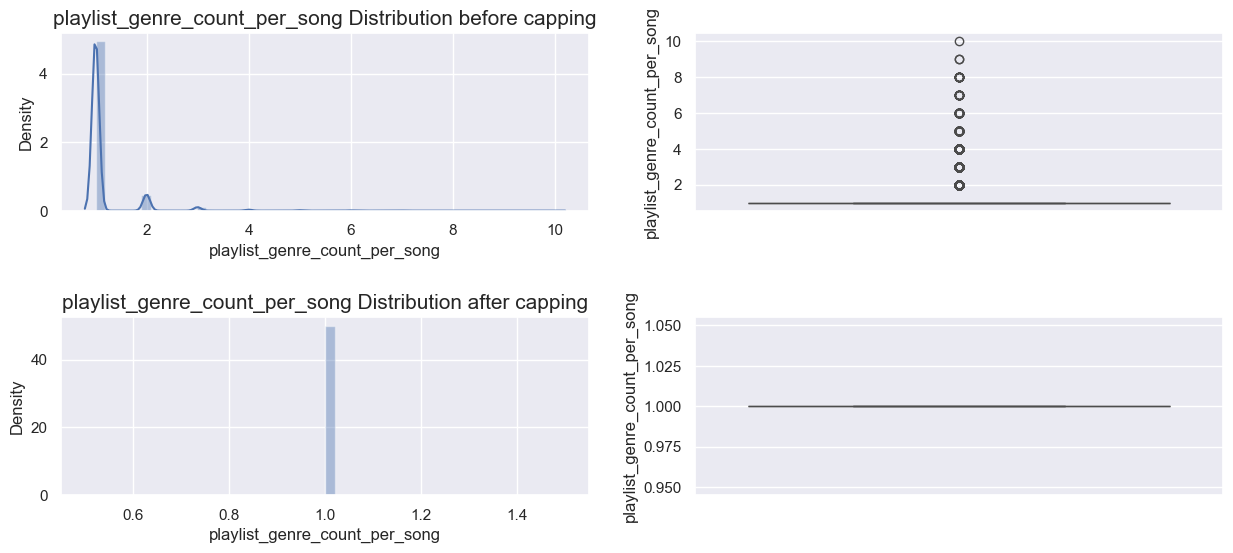

In [424]:
def dist_outliers(original_df, new, cols):
    for col in df_num_non_dummy:
        if col in cols:
            plt.figure(figsize=(15,6))
            plt.subplot(2,2,1)
            sns.distplot(original_df[col])
            plt.title('{} Distribution before capping'.format(col), fontsize=15)
            plt.subplot(2,2,2)
            sns.boxplot(original_df[col])
            plt.subplots_adjust(hspace = 0.6)
            plt.subplot(2,2,3)
            sns.distplot(new[col])
            plt.title('{} Distribution after capping'.format(col), fontsize=15)
            plt.subplot(2,2,4)
            sns.boxplot(new[col])
            plt.show()
dist_outliers(df, temp, outliers_df.index)

In [425]:

def cocor(x1,y1, x2,y2):
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1)/(1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2)/(1 - xy2))
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

In [426]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

# Assuming df_outliers is a DataFrame where outliers are marked (1 for outliers, 0 for non-outliers)
c = df_num_non_dummy
names = c.columns

# Creating df that reflects the correlation change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])

# A copy of numeric df
no_outliers = df_num_non_dummy.copy()
np.seterr(divide='ignore', invalid='ignore')

out_df_list = []  # Store results in a list to avoid inefficient appends

for i in names:
    # df with outliers
    out = df_num_non_dummy[i]
    
    # df without outliers
    non = df_num_non_dummy[i].loc[df_outliers[i] == 0]
    
    # label with outliers
    track_popularity_out = df_num_non_dummy['track_popularity']
    
    # label without outliers
    track_popularity_non = df_num_non_dummy['track_popularity'].loc[df_outliers[i] == 0]
    
    # Compute correlation change (assuming cocor function exists)
    try:
        p, pvalue = cocor(out, track_popularity_out, non, track_popularity_non)
        cor_change = '+' if pvalue < 0.05 else '-'
    except Exception as e:
        cor_change = 'Error'
    
    # Outliers count
    outlier_count = df_outliers[i].sum()
    
    # KS p-value for distribution change
    try:
        pval = ks_2samp(out, non)[1]
        dist_change = '+' if pval < 0.05 else '-'
    except Exception as e:
        dist_change = 'Error'
    
    # Append results as a dictionary (avoiding deprecated append method)
    out_df_list.append({
        'feature': i,
        'outliers_cnt': outlier_count,
        'distribution_changed': dist_change,
        'correlation_changed': cor_change
    })

# Convert list of dicts to DataFrame
out_df = pd.DataFrame(out_df_list)

# Display results
out_df.head(10)


,feature,outliers_cnt,distribution_changed,correlation_changed
0,track_popularity,0,-,-
1,danceability,4738,+,-
2,energy,3401,+,-
3,key,0,-,-
4,loudness,4965,+,-
5,mode,0,-,-
6,speechiness,5240,+,-
7,acousticness,4695,+,-
8,instrumentalness,6644,+,+
9,liveness,4503,+,+


In [427]:
#All 'Yes' Vars in the 'Drop'colums shall be deleted, since the infect correlation and distribution. 
#We don't want to delete vars that will change the distribution
out_df['drop']='yes'
out_df.loc[(out_df.distribution_changed=='+')& (out_df.correlation_changed=='+'),'drop'] = 'no'
out_df



,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,track_popularity,0,-,-,yes
1,danceability,4738,+,-,yes
2,energy,3401,+,-,yes
3,key,0,-,-,yes
4,loudness,4965,+,-,yes
5,mode,0,-,-,yes
6,speechiness,5240,+,-,yes
7,acousticness,4695,+,-,yes
8,instrumentalness,6644,+,+,no
9,liveness,4503,+,+,no


In [428]:
out_df.groupby('drop').size()

drop
no      4
yes    11
dtype: int64

In [429]:
relevant_columns_features=out_df.loc[out_df['drop']=='yes']['feature']
relevant_columns_features

0                  track_popularity
1                      danceability
2                            energy
3                               key
4                          loudness
5                              mode
6                       speechiness
7                      acousticness
10                          valence
13          playlist_count_per_song
14    playlist_genre_count_per_song
Name: feature, dtype: object

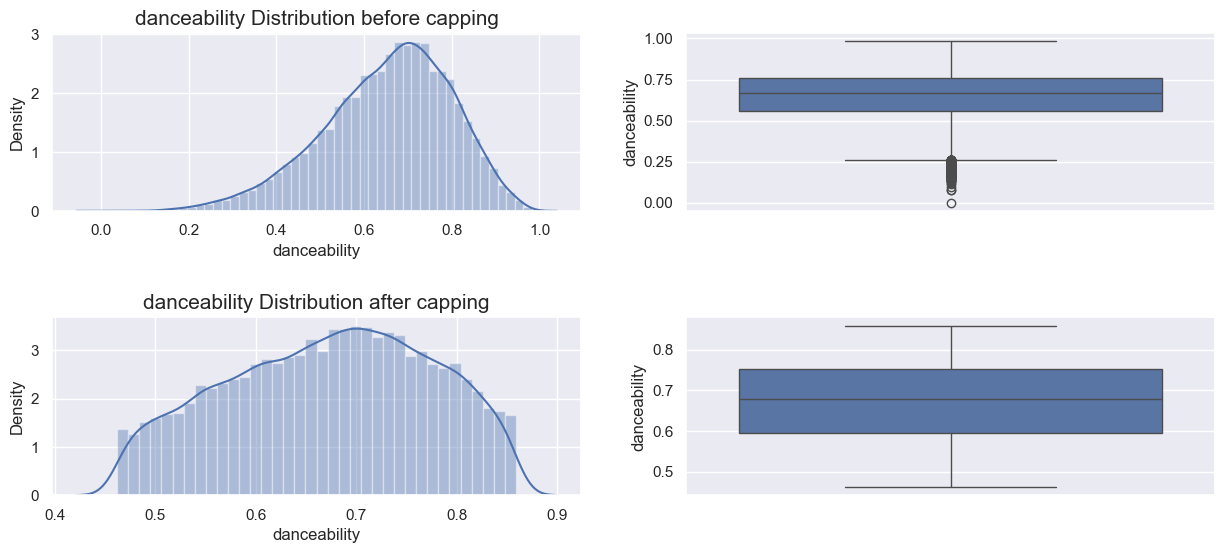

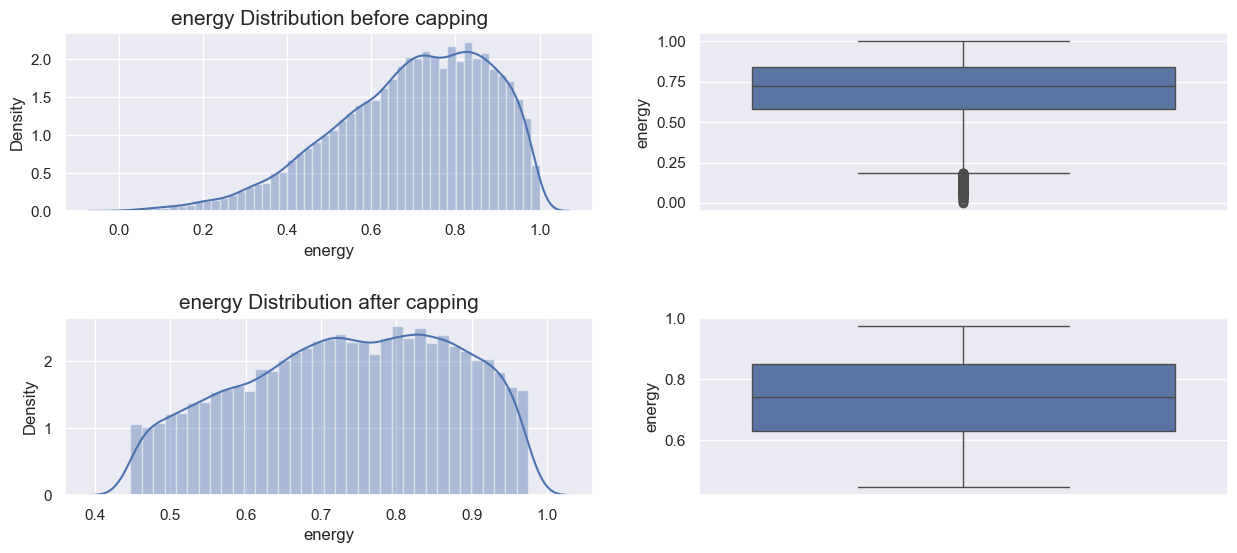

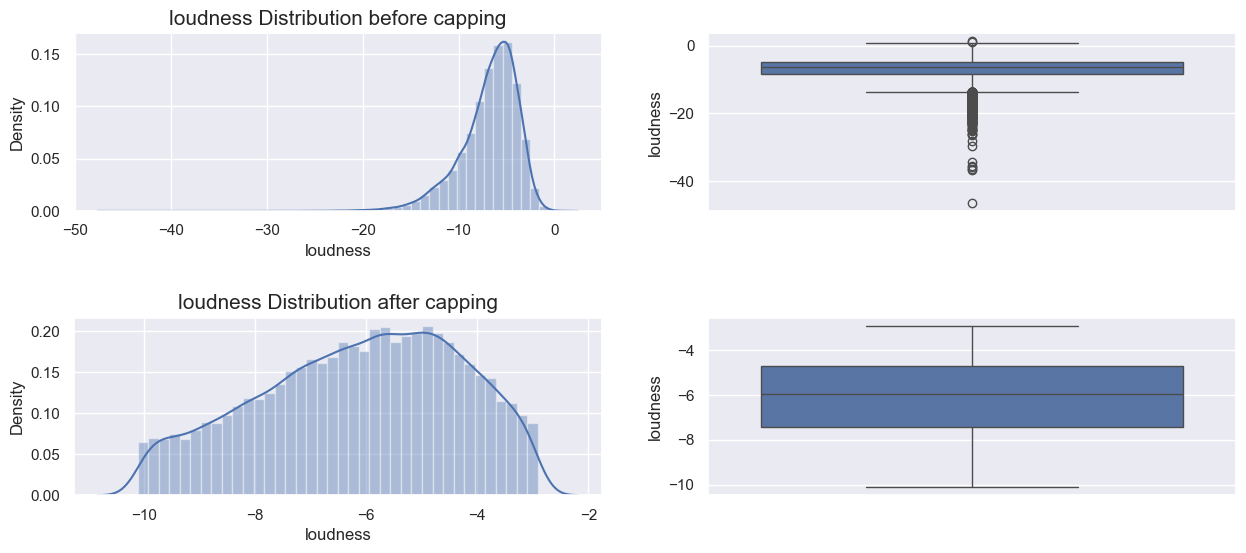

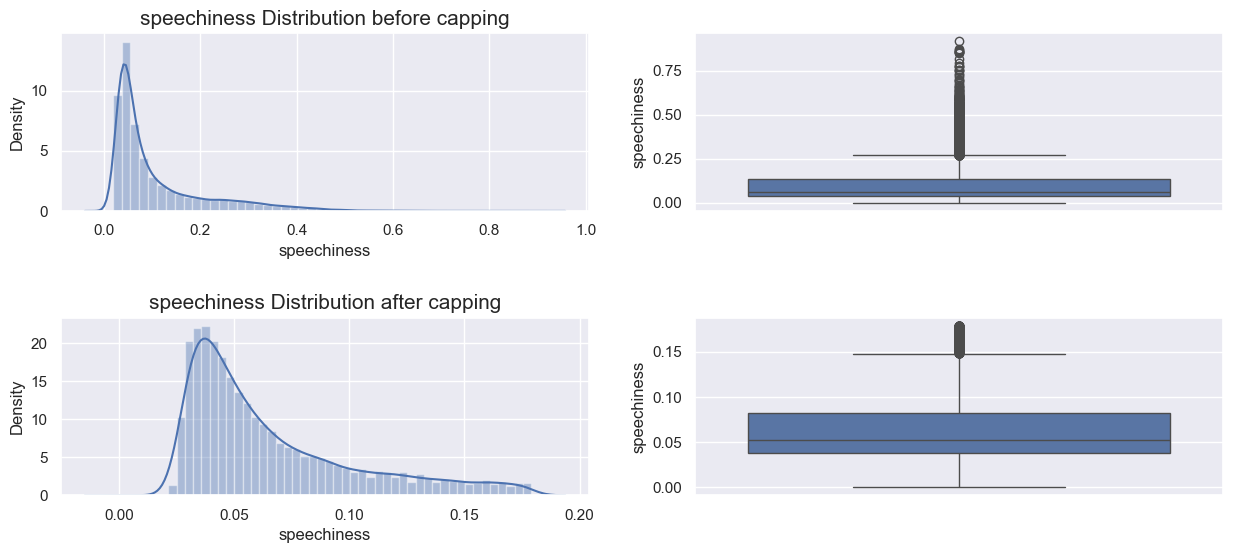

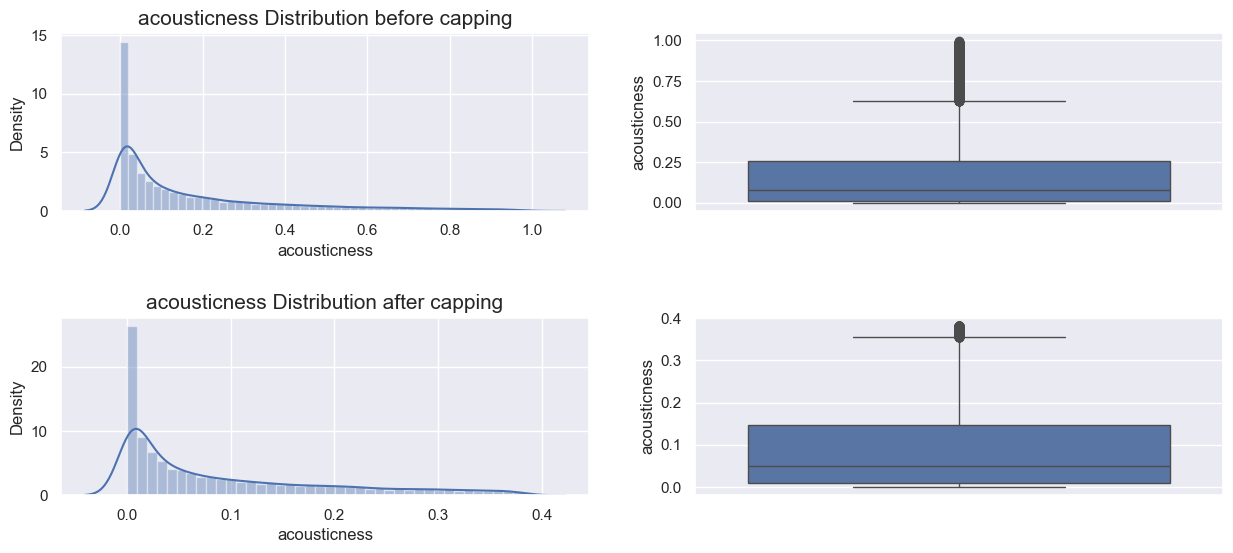

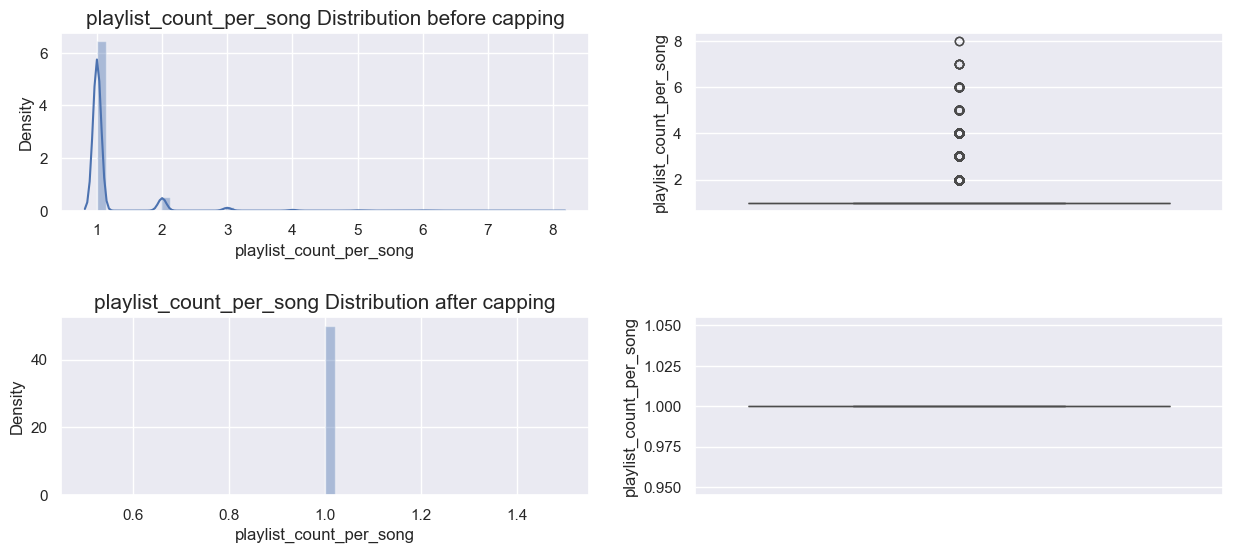

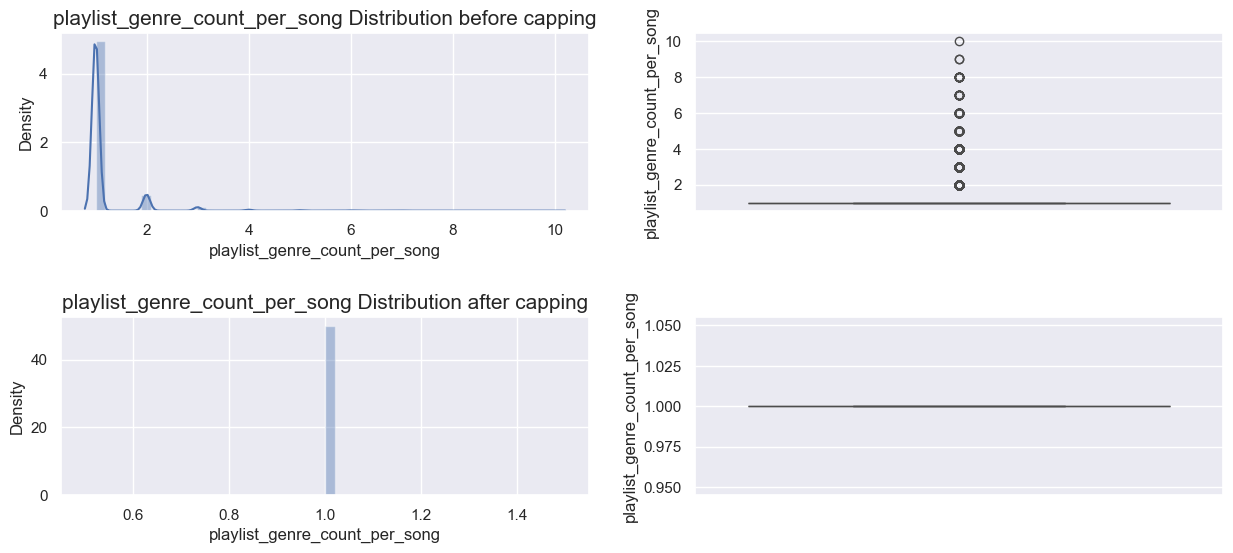

In [430]:
def dist_compare_after_capping(original_df, new, cols):
    for col in relevant_columns_features:
        if col in cols:
            plt.figure(figsize=(15,6))
            plt.subplot(2,2,1)
            sns.distplot(original_df[col])
            plt.title('{} Distribution before capping'.format(col), fontsize=15)
            plt.subplot(2,2,2)
            sns.boxplot(original_df[col])
            plt.subplots_adjust(hspace = 0.6)
            plt.subplot(2,2,3)
            sns.distplot(new[col])
            plt.title('{} Distribution after capping'.format(col), fontsize=15)
            plt.subplot(2,2,4)
            sns.boxplot(new[col])
            plt.show()
dist_compare_after_capping(df, temp, outliers_df.index)

In [431]:
remove_outliers=['speechiness','acousticness',
                'loudness','danceability','energy']

outliers_df.to_csv('outliers_df.csv')

remove_outliers

['speechiness', 'acousticness', 'loudness', 'danceability', 'energy']

In [432]:
df[['speechiness', 'acousticness', 'loudness', 'danceability', 'energy']]

,speechiness,acousticness,loudness,danceability,energy
0,0.0583,0.102000,-2.634,0.748,0.916
1,0.0373,0.072400,-4.969,0.726,0.815
2,0.0742,0.079400,-3.432,0.675,0.931
3,0.1020,0.028700,-3.778,0.718,0.930
4,0.0359,0.080300,-4.672,0.650,0.833
...,...,...,...,...,...
32828,0.0936,0.076600,-1.814,0.428,0.922
32829,0.0420,0.001710,-4.462,0.522,0.786
32830,0.0481,0.108000,-4.899,0.529,0.821
32831,0.1090,0.007920,-3.361,0.626,0.888


Removing outleirs that don't change correlation 



In [433]:
manipulated_data = df.copy()

for j in range(len(df)):
    for col in remove_outliers:
        if col in df_outliers.columns:  # Ensure column exists
            if df_outliers.iloc[j].get(col, 0) == 1:  # Use .get() to avoid KeyError
                manipulated_data.iloc[j][col] = 0

In [434]:
manipulated_data.to_pickle('df_cleaned.pkl')

# Missing Values Analysis and Imputation

## Checking the Missing Mechanisms


In [435]:
df = pd.read_pickle('df_cleaned.pkl')
df

,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count_per_song,playlist_genre_count_per_song
0,6f807x0ima9a1j3vpbc7vn,ed sheeran,66,2ocs0dgtsro98gh5zsl2cx,2019-06-14,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2,2
1,0r7cvbztwzgbtcydfa2p31,maroon 5,67,63rpso264urjw1x5e6cwv6,2019-12-13,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2,2
2,1z1hg7vb0ahhdiemnde79l,zara larsson,70,1hosmj2elcsrr0ve9gthr4,2019-07-05,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,3,3
3,75fpbthrwqmzhlbjlugdc7,the chainsmokers,60,1nqysoef1ykkugovchbsk6,2019-07-19,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,1,1
4,1e8pafckuyokkxphrhqw4x,lewis capaldi,69,7m7vv9wlq4i0lfujie2zsq,2019-03-05,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnkaamr3snq1vgluvfc1,lush simon,42,2azrobbweeeyhqv6sb7jrt,2014-04-28,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,1,1
32829,5aevni09em4575077nkwhz,tegan and sara,20,6kd6klxj7s8ece3abvayf5,2013-03-08,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,1,1
32830,7immqpp3q1yfuhvsdn7weo,starkillers,14,0ltwnsy9jgxoizo4vzuca6,2014-04-21,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,1,1
32831,2m69mhnfq1oq6lgtxuyhgx,mat zo,15,1fgrokhnhjcstl14znx8jy,2014-01-01,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,1,1


In [436]:
print(manipulated_data.isnull().sum())

track_id                            0
track_artist                        4
track_popularity                    0
track_album_id                      0
track_album_release_date         1681
danceability                        0
energy                              0
key                                 0
loudness                            0
mode                                0
speechiness                         0
acousticness                        0
instrumentalness                    0
liveness                            0
valence                             0
tempo                               0
duration_ms                         0
playlist_count_per_song             0
playlist_genre_count_per_song       0
dtype: int64


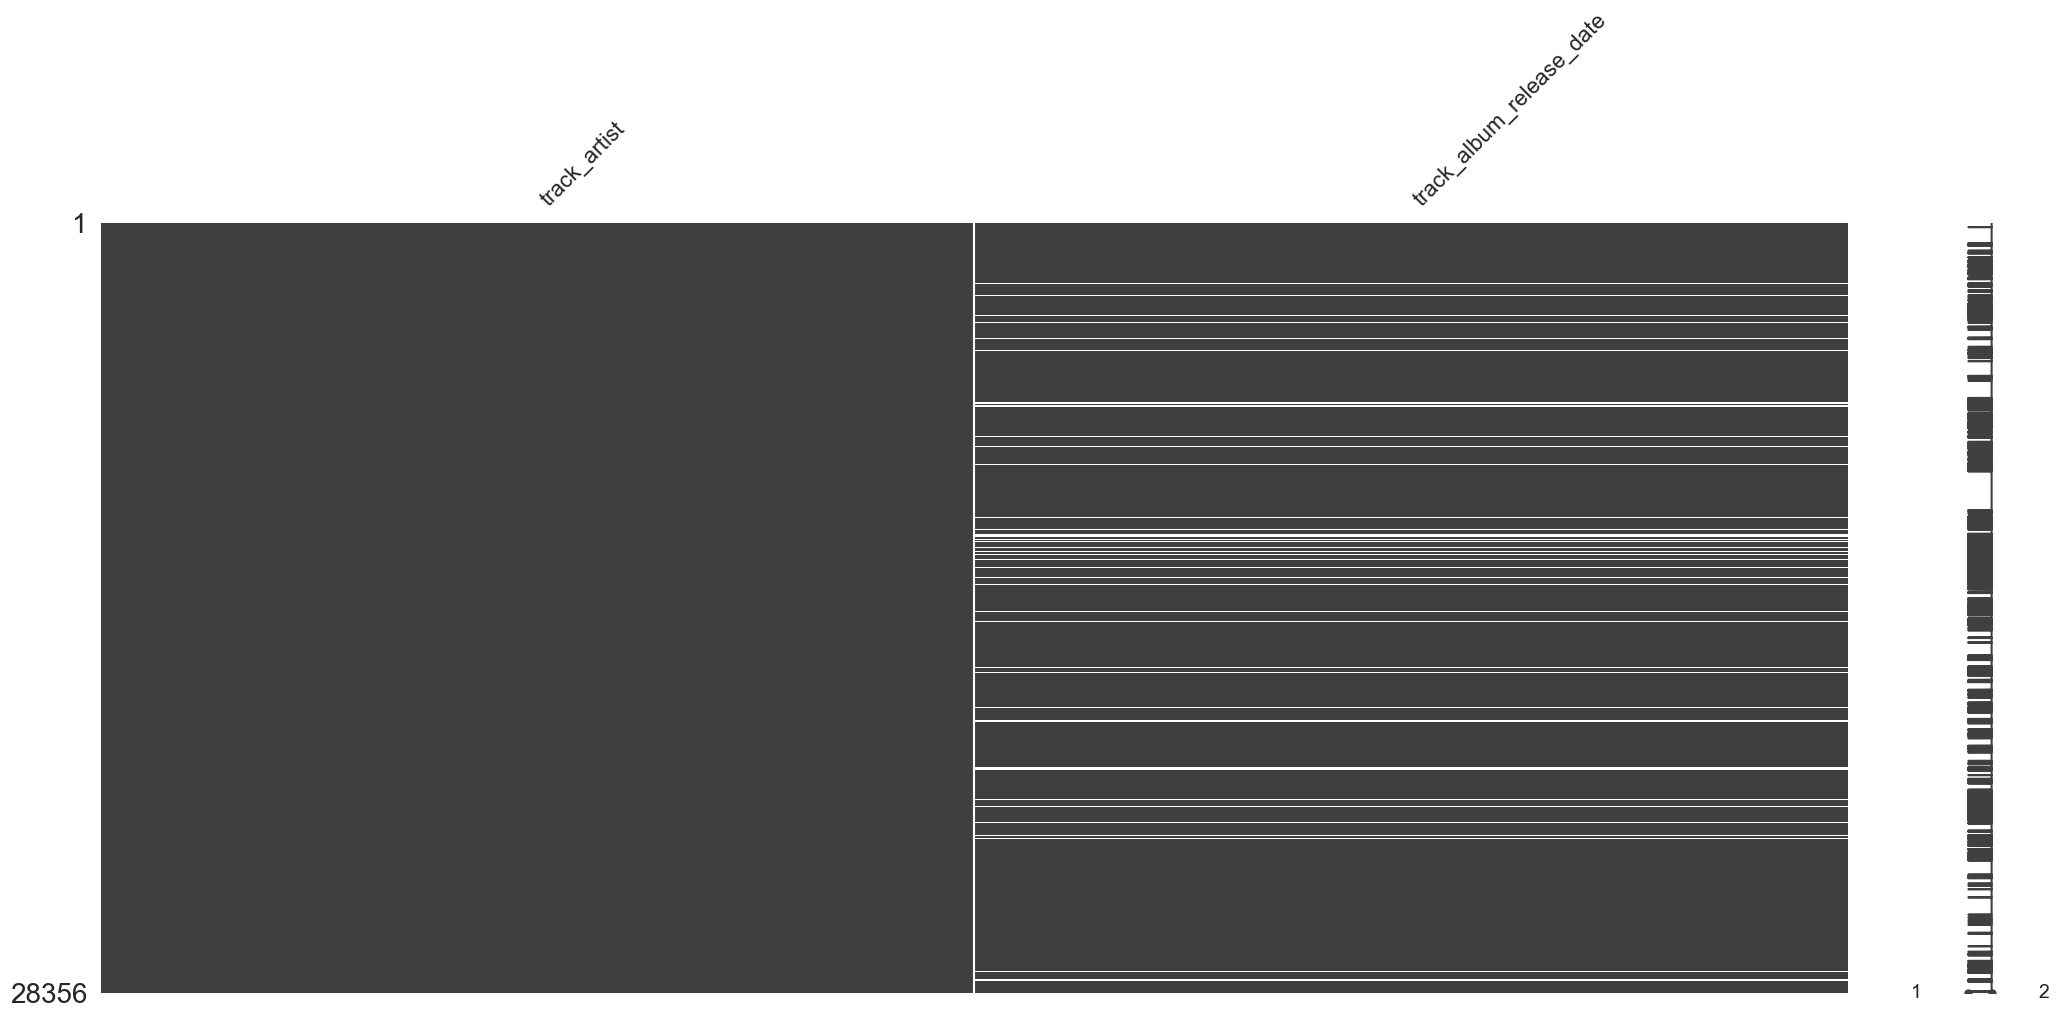

In [437]:
# Select only columns with missing values
missingdata_df = df.columns[df.isnull().any()].tolist()

# Plot the missing values matrix
msno.matrix(df[missingdata_df])

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

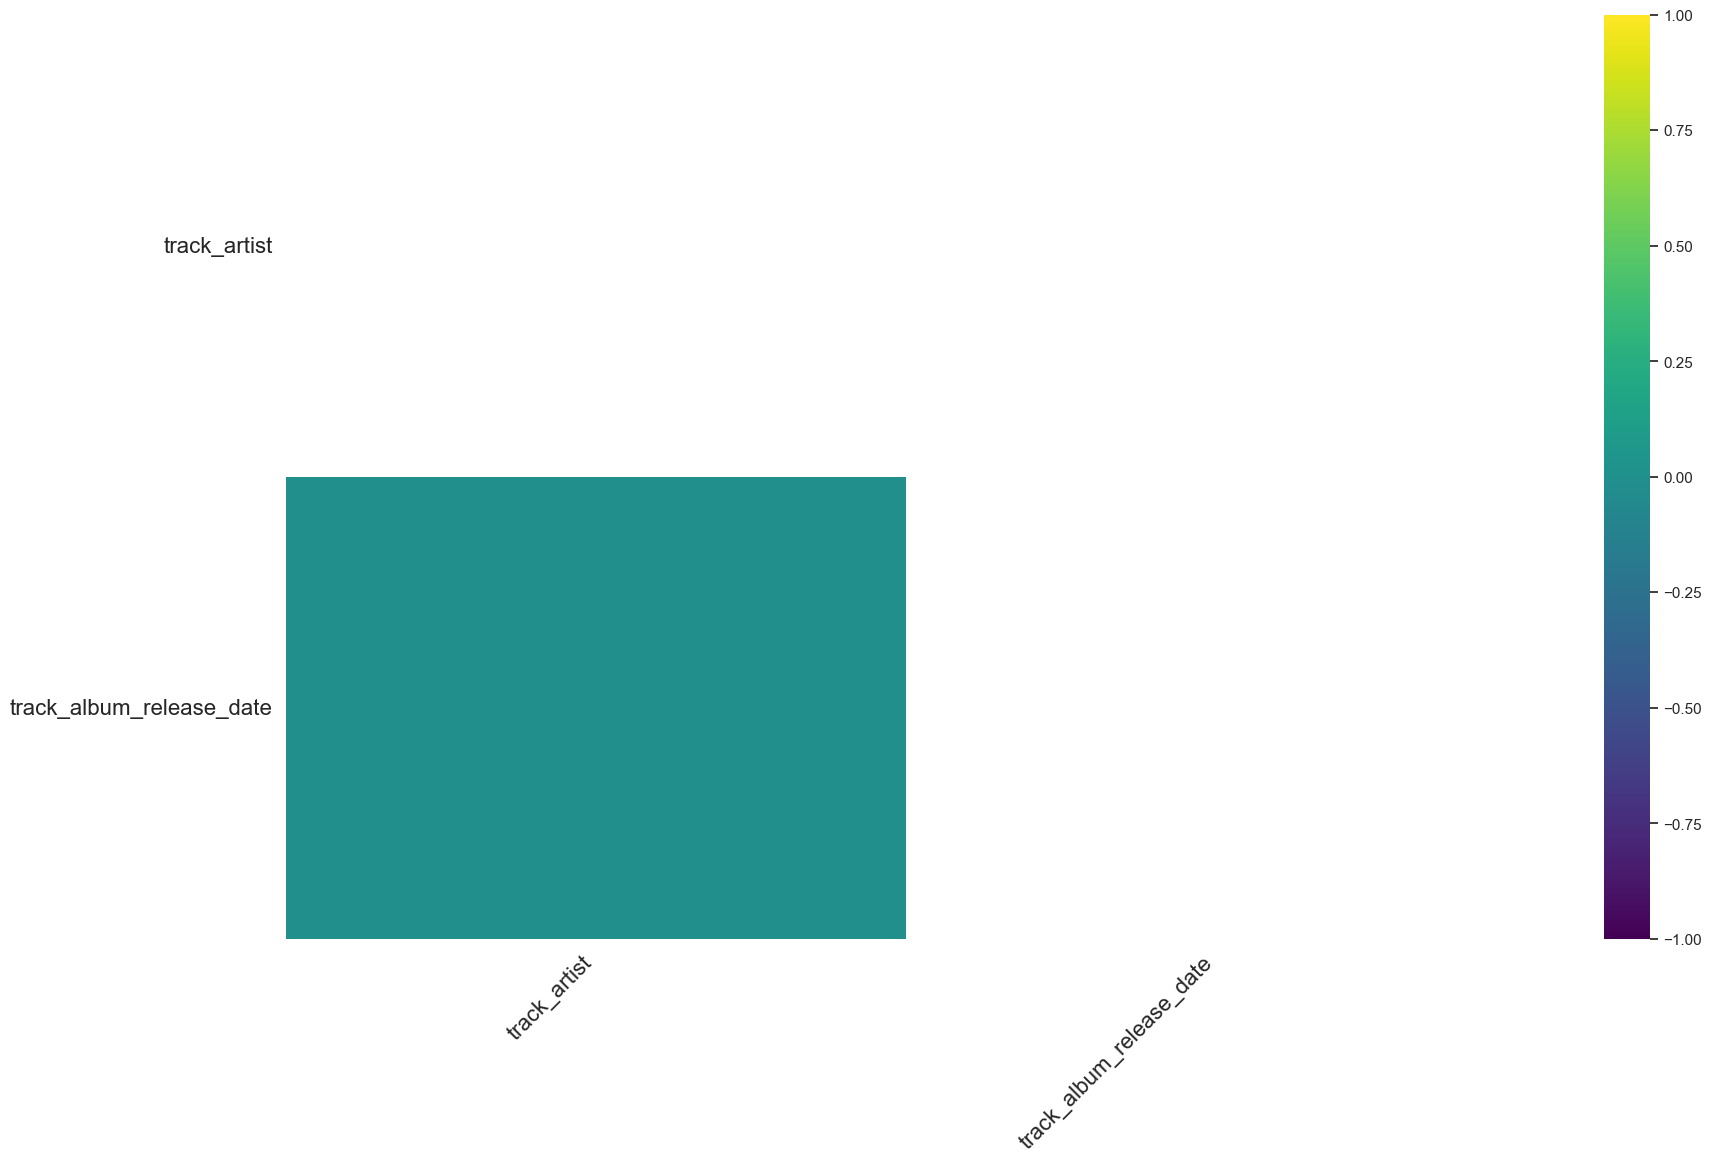

In [438]:
## missingness correlation heatmap

# Select columns with missing values
missingdata_df = df.columns[df.isnull().any()].tolist()

# Plot the missingness correlation heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
msno.heatmap(df[missingdata_df], cmap="viridis")

# Show the plot
plt.show()

In [439]:
df2 = df.copy()

df2['track_artist_na'] = 0
df2.loc[(df2['track_artist'].isnull()),['track_artist_na']] = 1

df2['track_album_release_date_na'] = 0
df2.loc[(df2['track_album_release_date'].isnull()),['track_album_release_date_na']] = 1

df2['danceability_na'] = 0
df2.loc[(df2['danceability'].isnull()),['danceability_na']] = 1

df2['energy_na'] = 0
df2.loc[(df2['energy'].isnull()),['energys_na']] = 1

df2['loudness_na'] = 0
df2.loc[(df2['loudness'].isnull()),['loudness_na']] = 1

df2['speechiness_na'] = 0
df2.loc[(df2['speechiness'].isnull()),['speechiness_na']] = 1

df2['acousticness_na'] = 0
df2.loc[(df2['acousticness'].isnull()),['acousticness_na']] = 1

df2.head()

,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,...,playlist_count_per_song,playlist_genre_count_per_song,track_artist_na,track_album_release_date_na,danceability_na,energy_na,energys_na,loudness_na,speechiness_na,acousticness_na
0,6f807x0ima9a1j3vpbc7vn,ed sheeran,66,2ocs0dgtsro98gh5zsl2cx,2019-06-14,0.748,0.916,6,-2.634,1,...,2,2,0,0,0,0,NaN,0,0,0
1,0r7cvbztwzgbtcydfa2p31,maroon 5,67,63rpso264urjw1x5e6cwv6,2019-12-13,0.726,0.815,11,-4.969,1,...,2,2,0,0,0,0,NaN,0,0,0
2,1z1hg7vb0ahhdiemnde79l,zara larsson,70,1hosmj2elcsrr0ve9gthr4,2019-07-05,0.675,0.931,1,-3.432,0,...,3,3,0,0,0,0,NaN,0,0,0
3,75fpbthrwqmzhlbjlugdc7,the chainsmokers,60,1nqysoef1ykkugovchbsk6,2019-07-19,0.718,0.930,7,-3.778,1,...,1,1,0,0,0,0,NaN,0,0,0
4,1e8pafckuyokkxphrhqw4x,lewis capaldi,69,7m7vv9wlq4i0lfujie2zsq,2019-03-05,0.650,0.833,1,-4.672,1,...,1,1,0,0,0,0,NaN,0,0,0


# Missing Values Imputation

### Dropout

In [440]:
df2 = df[['track_artist','track_album_release_date','danceability','energy','loudness','speechiness','acousticness']].replace(0, np.NaN)
df2 = df.copy()
# drop rows with missing values
df2.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(df2.shape)

(26671, 19)


From 28356 rows initially, we have 26671 rows now...

In [441]:
df.isna().sum()

track_id                            0
track_artist                        4
track_popularity                    0
track_album_id                      0
track_album_release_date         1681
danceability                        0
energy                              0
key                                 0
loudness                            0
mode                                0
speechiness                         0
acousticness                        0
instrumentalness                    0
liveness                            0
valence                             0
tempo                               0
duration_ms                         0
playlist_count_per_song             0
playlist_genre_count_per_song       0
dtype: int64

In [442]:
df2.isna().sum()

track_id                         0
track_artist                     0
track_popularity                 0
track_album_id                   0
track_album_release_date         0
danceability                     0
energy                           0
key                              0
loudness                         0
mode                             0
speechiness                      0
acousticness                     0
instrumentalness                 0
liveness                         0
valence                          0
tempo                            0
duration_ms                      0
playlist_count_per_song          0
playlist_genre_count_per_song    0
dtype: int64

### Statistical Imputation
 
This imply to substitute missing values by a statistical measure. The most commonly used are the mean and the median.

In [443]:
##### indicate the missing points with one_zero 
# [['sws','ps','ts','mls','gt']]
df2 = df.copy()

df2['track_artist_na'] = 0
df2.loc[(df2['track_artist'].isnull()),['track_artist_na']] = 1

df2['track_album_release_date_na'] = 0
df2.loc[(df2['track_album_release_date'].isnull()),['track_album_release_date_na']] = 1

df2['danceability_na'] = 0
df2.loc[(df2['danceability'].isnull()),['danceability_na']] = 1

df2['energy_na'] = 0
df2.loc[(df2['energy'].isnull()),['energy_na']] = 1

df2['loudness_na'] = 0
df2.loc[(df2['loudness'].isnull()),['loudness_na']] = 1

df2['speechiness_na'] = 0
df2.loc[(df2['speechiness'].isnull()),['speechiness_na']] = 1

df2['acousticness_na'] = 0
df2.loc[(df2['acousticness'].isnull()),['acousticness_na']] = 1

df2.head()




,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,...,duration_ms,playlist_count_per_song,playlist_genre_count_per_song,track_artist_na,track_album_release_date_na,danceability_na,energy_na,loudness_na,speechiness_na,acousticness_na
0,6f807x0ima9a1j3vpbc7vn,ed sheeran,66,2ocs0dgtsro98gh5zsl2cx,2019-06-14,0.748,0.916,6,-2.634,1,...,194754,2,2,0,0,0,0,0,0,0
1,0r7cvbztwzgbtcydfa2p31,maroon 5,67,63rpso264urjw1x5e6cwv6,2019-12-13,0.726,0.815,11,-4.969,1,...,162600,2,2,0,0,0,0,0,0,0
2,1z1hg7vb0ahhdiemnde79l,zara larsson,70,1hosmj2elcsrr0ve9gthr4,2019-07-05,0.675,0.931,1,-3.432,0,...,176616,3,3,0,0,0,0,0,0,0
3,75fpbthrwqmzhlbjlugdc7,the chainsmokers,60,1nqysoef1ykkugovchbsk6,2019-07-19,0.718,0.930,7,-3.778,1,...,169093,1,1,0,0,0,0,0,0,0
4,1e8pafckuyokkxphrhqw4x,lewis capaldi,69,7m7vv9wlq4i0lfujie2zsq,2019-03-05,0.650,0.833,1,-4.672,1,...,189052,1,1,0,0,0,0,0,0,0


In [444]:


danceability_mean = df2['danceability'].mean()
df2['danceability'] = df2['danceability'].fillna(danceability_mean)

energy_mean = df2['energy'].mean()
df2['energy'] = df2['energy'].fillna(energy_mean)

loudness_mean = df2['loudness'].mean()
df2['loudness'] = df2['loudness'].fillna(loudness_mean)

speechiness_mean = df2['speechiness'].mean()
df2['speechiness'] = df2['speechiness'].fillna(speechiness_mean)

acousticness_mean = df2['acousticness'].mean()
df2['acousticness'] = df2['acousticness'].fillna(acousticness_mean)

# summarize the number of rows and columns in the dataset
print(df2.shape)
df2.head()

(28356, 26)


,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,...,duration_ms,playlist_count_per_song,playlist_genre_count_per_song,track_artist_na,track_album_release_date_na,danceability_na,energy_na,loudness_na,speechiness_na,acousticness_na
0,6f807x0ima9a1j3vpbc7vn,ed sheeran,66,2ocs0dgtsro98gh5zsl2cx,2019-06-14,0.748,0.916,6,-2.634,1,...,194754,2,2,0,0,0,0,0,0,0
1,0r7cvbztwzgbtcydfa2p31,maroon 5,67,63rpso264urjw1x5e6cwv6,2019-12-13,0.726,0.815,11,-4.969,1,...,162600,2,2,0,0,0,0,0,0,0
2,1z1hg7vb0ahhdiemnde79l,zara larsson,70,1hosmj2elcsrr0ve9gthr4,2019-07-05,0.675,0.931,1,-3.432,0,...,176616,3,3,0,0,0,0,0,0,0
3,75fpbthrwqmzhlbjlugdc7,the chainsmokers,60,1nqysoef1ykkugovchbsk6,2019-07-19,0.718,0.930,7,-3.778,1,...,169093,1,1,0,0,0,0,0,0,0
4,1e8pafckuyokkxphrhqw4x,lewis capaldi,69,7m7vv9wlq4i0lfujie2zsq,2019-03-05,0.650,0.833,1,-4.672,1,...,189052,1,1,0,0,0,0,0,0,0


In [445]:
print(df.describe())
print("----------------------------------------------------------------------------------")
print(df2.describe())

       track_popularity       track_album_release_date  danceability  \
count      28356.000000                          26675  28356.000000   
mean          39.329771  2012-08-03 13:38:06.860356096      0.653372   
min            0.000000            1957-01-01 00:00:00      0.000000   
25%           21.000000            2010-04-25 12:00:00      0.561000   
50%           42.000000            2016-11-11 00:00:00      0.670000   
75%           58.000000            2019-04-12 00:00:00      0.760000   
max          100.000000            2020-01-29 00:00:00      0.983000   
std           23.702376                            NaN      0.145785   

             energy           key      loudness          mode   speechiness  \
count  28356.000000  28356.000000  28356.000000  28356.000000  28356.000000   
mean       0.698388      5.368000     -6.817696      0.565489      0.107954   
min        0.000175      0.000000    -46.448000      0.000000      0.000000   
25%        0.579000      2.000000  

NaNs Filled with Mean

### Machine Learning imputation: KNN imputation

In [448]:
#I have identified missing values in a categorical column within the dataset. Proper handling of these missing values is essential to ensure data integrity and maintain the accuracy of any subsequent analysis or modeling.

In [449]:
df1 = df.copy()

In [450]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   track_id                       28356 non-null  string        
 1   track_artist                   28352 non-null  string        
 2   track_popularity               28356 non-null  int64         
 3   track_album_id                 28356 non-null  string        
 4   track_album_release_date       26675 non-null  datetime64[ns]
 5   danceability                   28356 non-null  float64       
 6   energy                         28356 non-null  float64       
 7   key                            28356 non-null  int64         
 8   loudness                       28356 non-null  float64       
 9   mode                           28356 non-null  int64         
 10  speechiness                    28356 non-null  float64       
 11  acousticness        

In [451]:
df1.isna().sum()

track_id                            0
track_artist                        4
track_popularity                    0
track_album_id                      0
track_album_release_date         1681
danceability                        0
energy                              0
key                                 0
loudness                            0
mode                                0
speechiness                         0
acousticness                        0
instrumentalness                    0
liveness                            0
valence                             0
tempo                               0
duration_ms                         0
playlist_count_per_song             0
playlist_genre_count_per_song       0
dtype: int64

In [452]:
from sklearn.impute import KNNImputer
df1 = df.copy()
imp_cols = df1.select_dtypes(include = ['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=1)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(df1[imp_cols]),columns = imp_cols)

In [453]:
!pip install fancyimpute
import fancyimpute 

In [454]:
fancyimpute.__version__


'0.7.0'

In [455]:
X = df.copy()
X = X.iloc[:,1:11]
X.head()

,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,speechiness
0,ed sheeran,66,2ocs0dgtsro98gh5zsl2cx,2019-06-14,0.748,0.916,6,-2.634,1,0.0583
1,maroon 5,67,63rpso264urjw1x5e6cwv6,2019-12-13,0.726,0.815,11,-4.969,1,0.0373
2,zara larsson,70,1hosmj2elcsrr0ve9gthr4,2019-07-05,0.675,0.931,1,-3.432,0,0.0742
3,the chainsmokers,60,1nqysoef1ykkugovchbsk6,2019-07-19,0.718,0.930,7,-3.778,1,0.1020
4,lewis capaldi,69,7m7vv9wlq4i0lfujie2zsq,2019-03-05,0.650,0.833,1,-4.672,1,0.0359


In [456]:
X.columns

Index(['track_artist', 'track_popularity', 'track_album_id',
       'track_album_release_date', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness'],
      dtype='object')

In [ ]:
## pickle

In [ ]:
# Specify the filename
filename = 'Data_Cleansing_spotify_songs.pkl'

# Save DataFrame to a pickle file
df_unique.to_pickle(filename)

# Load DataFrame from a pickle file
df_unique = pd.read_pickle(filename)